# Part II - Ford GoBike Dataset Explanatory Presentation.
---
### By: Benjamin Adekunle Ojo.

## Investigation Overview
---

Ford GoBike was a bike-sharing system that covered the greater San Francisco Bay area from 2017 to 2019. This dataset has information on trips taken on 2019.The aim of the project is to exam how various features garthered from users can help increase trip duration from the type of users, gender, location of stations, time of the day, and some much more. 

First of all, I will be presenting a histogram of trip duration distribution has this is our main feature of interest, viewing this will give us how the data is distributed, and which custer has the most frequency. 

secondly, using a line plot and histogram I would be presenting a distribution of starting hours, this show us how then number of trip each hours generate. 

Next, we will be observing the relationship between age and starting hours in the form of a heat map, this will show us how differe age take their bike during hours of the day. 

Lastly, i will be presenting the multivariate plot showing the relationship between user type, gender, and trip duration. 

## Dataset Overview
---
The dataset was provided by Ford Gobike System and it contains activities of customers who made use of Ford GoBike System from 2017 to 2019. The following are features contain in the Dataset:

 * `bike_id`: Unique string for every bike owed by Ford GoBike.
 
 * `duration_sec`: The duration in seconds for each trip.
 
 * `start_time`: The time a user started his or her trip.
 
 * `end_time`: The time a user ended his or her trip.
 
 * `start_station_id`: A unique string for each starting station maintained by ford GoBike.
 
 * `start_station_name`: Starting Station name.
 
 * `start_station_latitude`: Starting station latitude Location of station.
 
 * `start_station_longitude`: Starting longitude location of station.
 
 * `end_station_id`: A unique string for each ending station maintained by ford GoBike.
 
 * `end_station_name`: End station name.
 
 * `end_station_latitude`: End station latitude Location of station.
 
 * `end_station_longitude`: End station longitude location of station. 
 
 * `user_type`: Is the user a customer or subscriber. 
 
 * `member_birth_year`: Year user created or use a ford Goford account.
 
 * `member_gender`: Is the user a Male or Famale.
 
 * `bike_share_for_all_trip`: This is a discounted memberships for low-income riders. 

The main objective of the project was to exam the data using explorative and explanator visualizations. My main features i'm interest in is the trip duration feature, this provide the lenth of time a user used a gobike bike, and i would be examing features that influence the behavour or duration of this services. 


In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
gobike_data = pd.read_csv('data/fordgobike_master_dataset.csv')

In [15]:
# Converting the data formate 
gobike_copy = gobike_data

In [16]:
# viewing the data structure of the dataset. 
gobike_copy[['start_station_id', 'bike_id', 'end_station_id']].info()

# List of columns 
id_col = ['start_station_id', 'bike_id', 'end_station_id']

# Defining a data type converter function

def dtype_converter(data, column, dtype, cat_list= None, cat_order= False): 
    """
    This Fuction convert data from one type to another, and the following 
    arguments help in achiving this are: 
    data --> The name of the dataset.
    columns --> A list of columns that you will like to convert.
    dtype --> The data type you will like to convert you data to. 
    cat_list --> This is most useful for converting categorical variable data
    cat_order --> This is also used by for categorical variables and it to know whether
                    the feature is a order or discret data type. 
    """
 
    if dtype == 'float': 
        return data[column].astype(float)
                    
    elif dtype == 'str': 
        return data[column].astype(str)
        
    elif dtype == 'int': 
        return data[column].astype(int)
                   
    elif dtype == 'categorical': 
        vclass = pd.api.types.CategoricalDtype(ordered = cat_order, categories = cat_list)
            
        return data[column].astype(vclass)
    
    elif dtype == 'datetime': 
        return pd.to_datetime(data[column])


# Converting i.d features to string. 
gobike_copy['start_station_id'] = dtype_converter(data = gobike_copy, column = 'start_station_id' , dtype = 'str')
gobike_copy['bike_id'] = dtype_converter(data = gobike_copy, column = 'bike_id' , dtype = 'str')
gobike_copy['end_station_id'] = dtype_converter(data = gobike_copy, column = 'end_station_id' , dtype = 'str')

# view data structure. 
gobike_copy[id_col].info()


# Gender column values. 
gender = gobike_copy.member_gender.value_counts().index.to_list()

# Conveting the member_gender column to categorical data type. 
gobike_copy['member_gender'] = dtype_converter(data=gobike_copy, column= 'member_gender', dtype = 'categorical', cat_list = gender)


# user type column values. 
utype = gobike_copy.user_type.value_counts().index.to_list()

# Converting the user type column to a categorical data type. 
gobike_copy['user_type'] = dtype_converter(data=gobike_copy, column= 'user_type', dtype = 'categorical', cat_list = utype)


# convert start time and end time to datetime
dates = ['start_time', 'end_time']

for column in dates:
    gobike_copy[column] = dtype_converter(data = gobike_copy, column = column, dtype = 'datetime')
    

# Bike share value count
gobike_copy.bike_share_for_all_trip.value_counts().index

# Define a bool converter function

def bool_converter(x): 
    if x == 'No':
        return False
    elif x == 'Yes': 
        return True
    
# converting to bool 
gobike_copy['bike_share_for_all_trip'] = gobike_copy['bike_share_for_all_trip'].apply(bool_converter)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_station_id  174952 non-null  float64
 1   bike_id           174952 non-null  int64  
 2   end_station_id    174952 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  174952 non-null  object
 1   bike_id           174952 non-null  object
 2   end_station_id    174952 non-null  object
dtypes: object(3)
memory usage: 4.0+ MB


In [17]:
# Checking the data formate

gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  0 non-null       object        
 12  duration_min    

In [18]:
# Creating addition Columns

# Assigning dataset.
gobike = gobike_copy


# Creating a week_day feature from start_time column. 
gobike['week_day'] = gobike['start_time'].dt.day_name()
week_day = gobike['week_day'].value_counts().index.to_list()

# convert the data type from object to convert 
gobike['week_day'] = dtype_converter(data = gobike, column = 'week_day',dtype= 'categorical', cat_list = week_day)

# Creating hour column 
gobike['hours'] = gobike['start_time'].dt.hour
hours = gobike['hours'].value_counts().index.to_list()
hours = list(np.arange(len(hours)))

# convert the data type from int to categorical data type. 
gobike['hours'] = dtype_converter(data = gobike, column = 'hours', cat_list = hours, 
                                  dtype = 'categorical', cat_order = True)

# Creating the age column
gobike['age'] = 2019 - gobike['member_birth_year']
gobike['age'] = dtype_converter(data = gobike, column = 'age',dtype = 'int')

# converting the member birth year to int. 
gobike['member_birth_year'] = dtype_converter(data = gobike, column = 'member_birth_year', dtype = 'int')

In [19]:
# Check data structures. 
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int32         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  0 non-null       object        
 12  duration_min    

## Trip Duration Distribution: 

Making the log transformation made analysis easier. The resulting distribution resembles a normal one. Most trips take between 300 and 1000 seconds, i.e., between 5 and 15 minutes. 

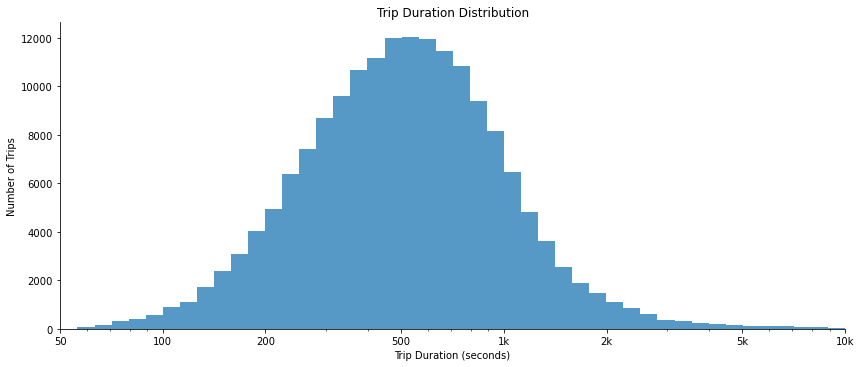

In [20]:
# set new bins
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)

# plot chart
sns.displot(gobike['duration_sec'], bins=bins)

# use log scale in the x-axis
plt.xscale('log')

# set the xticks and xtick labels

plt.xticks([0, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [0, 50, 100, 200, 500, '1k', '2k', '5k', '10k'])

# crop x-axis to remove outliers
plt.xlim((50, 1e4))

# axis labels
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')

# increase figure size
plt.gcf().set_size_inches(14,5)

# set title
plt.title('Trip Duration Distribution');

## Starting Hours and trip duration distribution.

 During peak times, the number of trips increase significantly. In order to emphasize this trend, I included two vertical lines on the two peaks: one at 8 a.m., and another at 5 p.m. (17:00).

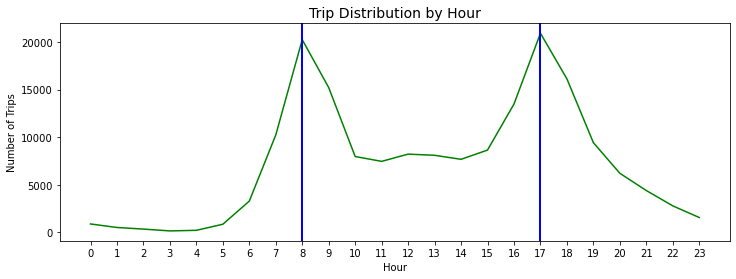

In [21]:
# get the indexes of the peak hours
# this will be useful when rawing the vertical line
# in the x-axis below to draw attention to peak times: 17:00 and 8:00
# get the number of trips per hour
hour_freq = gobike['hours'].value_counts()
hour_freq

hour_sorted = hour_freq.index


# plot line chart of the hourly distribution of trips
plt.figure(figsize=[12,4])
sns.lineplot(x=hour_freq.keys(), y=hour_freq,color = 'g')
plt.xticks(range(0,24))
plt.axvline(x=hour_sorted[0], color='b', linewidth=2)
plt.axvline(x=hour_sorted[1], color='b', linewidth=2)
plt.ylabel('Number of Trips')
plt.xlabel('Hour')
plt.title('Trip Distribution by Hour', fontsize=14);

## Age V.s Starting Hours. 

From the heat map above, we can see most trips were taken by people in their 20s to 40s. The peaks at 8am and 5pm are also observable.

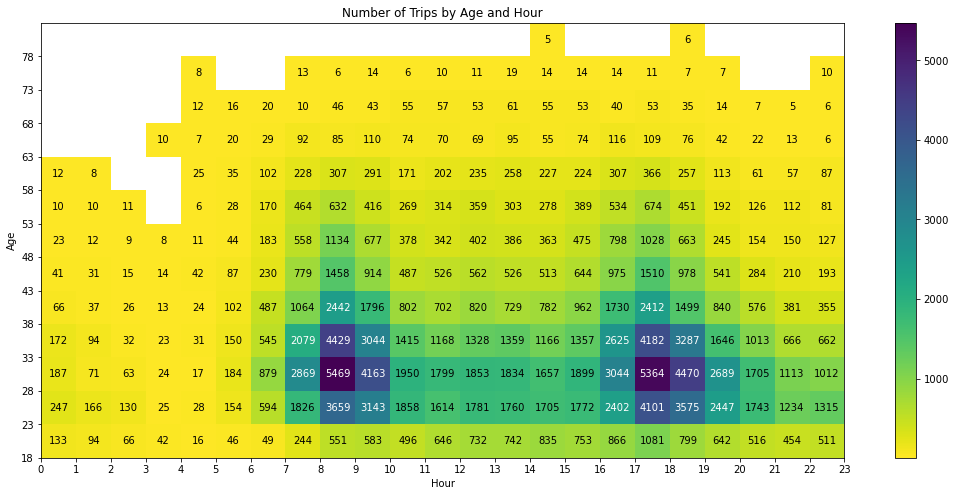

In [22]:
# Bin size.
bins_x = np.arange(0, gobike['hours'].max()+1, 1)
bins_y = np.arange(18, 80+5, 5)

# Plotting a 2d histogram
plt.figure(figsize=[18,8])
h2d = plt.hist2d(data=gobike, x='hours', y='age', cmin=5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xticks(range(0,24));
plt.yticks(range(18,80+1,5))
plt.ylabel('Age')
plt.xlabel('Hour')
plt.title('Number of Trips by Age and Hour')


# loop to print the counts for each block
counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 2e3:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                      ha='center', va='center', color='black');

##  Gender vs. Trip Duration (minutes) vs. user_type
From the point plot, we can see that causal customers have longer average trips than subscribers, for every gender. Also, for non-binary individuals, the average trip is slightly longer for both user type groups, when compared to males and females. When compared to men, women take slightly longer trips as well.

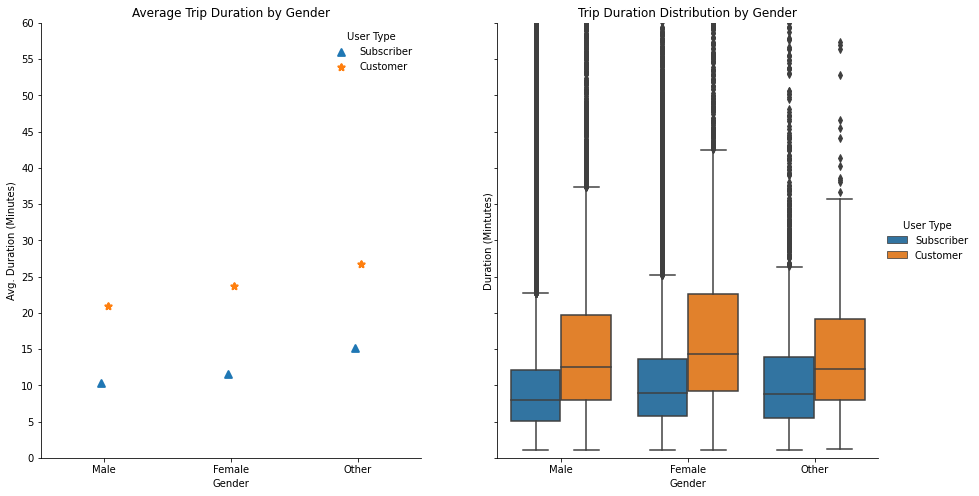

In [23]:
# Plot the data using three variables:
# Gender on the x-axis,
# Mean trip duration on the y-axis and,
# User Type a color encoding (hue)

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# plot 1: point plot
sns.pointplot(ax=axes[0], data=gobike, x='member_gender', y='duration_min', hue='user_type',
             dodge=True, linestyles="", ci=None, markers=["^", "*"])
sns.despine()
axes[0].set_yticks(np.arange(0, 60+5, 5))
axes[0].legend(title='User Type', frameon=False, loc=1)
axes[0].set_ylabel('Avg. Duration (Minutes)')
axes[0].set_xlabel('Gender')
axes[0].set_title('Average Trip Duration by Gender');

# plot 2: box plot
sns.boxplot(ax=axes[1], data=gobike, x='member_gender', y='duration_min', hue='user_type')
axes[1].set_ylim([0, 60])
axes[1].set_ylabel('Duration (Mintutes)')
axes[1].set_xlabel('Gender');
axes[1].legend(title='User Type', frameon=False, loc=6, bbox_to_anchor=(1.0, 0.5))
axes[1].set_title('Trip Duration Distribution by Gender');

In [24]:
# Use this command if you are running this file in local
!jupyter nbconvert C:\Users\lordalpha\Documents\Data_Project\Udacity_project\Ford_GoBike_System\Part_II_forgobike_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook C:\Users\lordalpha\Documents\Data_Project\Udacity_project\Ford_GoBike_System\Part_II_forgobike_slide.ipynb to slides
[NbConvertApp] Writing 791816 bytes to C:\Users\lordalpha\Documents\Data_Project\Udacity_project\Ford_GoBike_System\Part_II_forgobike_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\lordalpha\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\lordalpha\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\lordalpha\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\lordalpha\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_no